In [1]:
# Copyright 2021 National Technology & Engineering Solutions of Sandia, LLC (NTESS).
# Under the terms of Contract DE-NA0003525 with NTESS,
# the U.S. Government retains certain rights in this software.
"""This example demonstrates how to plot gamma spectra."""
import sys

from riid.data.synthetic import get_dummy_seeds
from riid.visualize import plot_spectra, plot_fg_and_bg_spectra
from riid.data.synthetic.seed import SeedMixer
from riid.data.synthetic.static import StaticSynthesizer

import matplotlib.pyplot as plt
import numpy as np

Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


# Plot Spectra

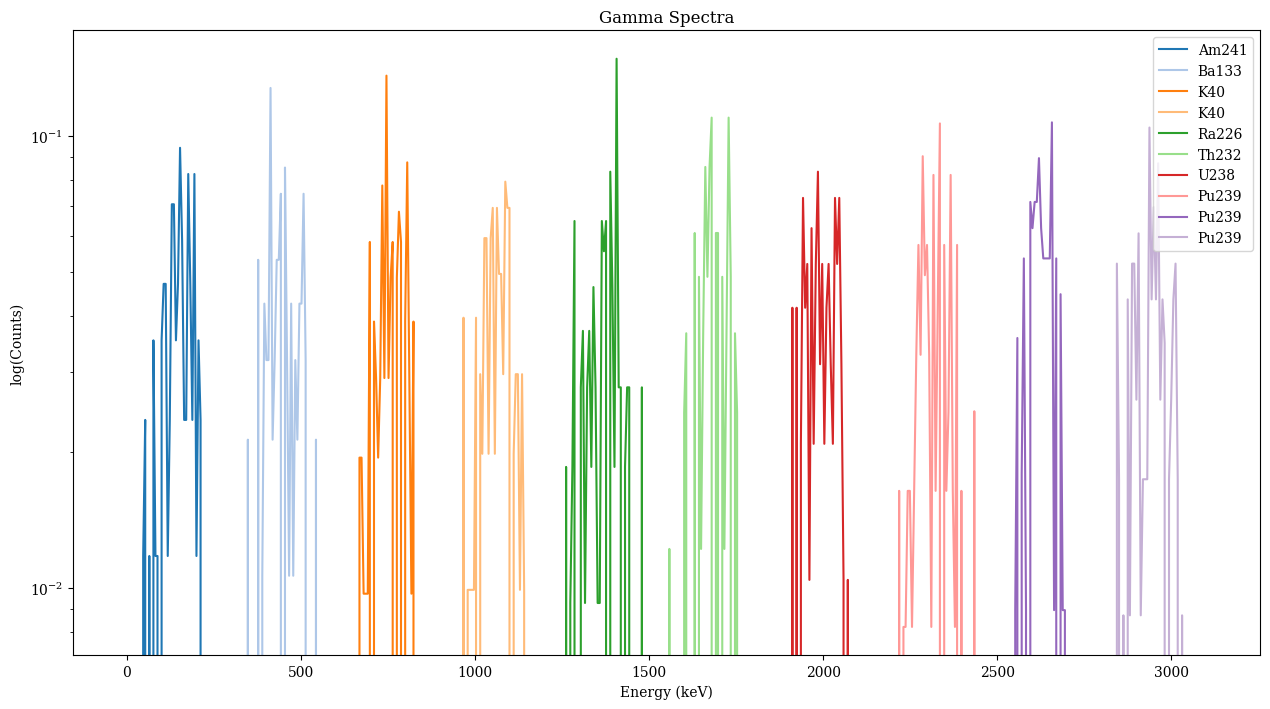

(<Figure size 1280x720 with 1 Axes>,
 <Axes: title={'center': 'Gamma Spectra'}, xlabel='Energy (keV)', ylabel='log(Counts)'>)

In [2]:
if len(sys.argv) == 2:
    import matplotlib
    matplotlib.use("Agg")

seeds_ss = get_dummy_seeds()

plot_spectra(seeds_ss, ylim=(None, None), in_energy=True)

# Plot FG and BG

In [3]:
fg_ss, bg_ss = get_dummy_seeds(normalize=False, live_time=600, count_rate=2000).split_fg_and_bg()
print(fg_ss.spectra.iloc[0])


0      162
1      227
2      375
3      553
4      867
      ... 
507      0
508      0
509      0
510      0
511      0
Name: 0, Length: 512, dtype: int64


In [4]:
fg_seeds_ss, bg_seeds_ss = get_dummy_seeds().split_fg_and_bg()
mixed_bg_seed_ss = SeedMixer(bg_seeds_ss, mixture_size=3).generate(10)

static_synth = StaticSynthesizer(
    samples_per_seed=100,
    snr_function="log10",
    snr_function_args=(50, 100),
    return_fg=True,
    return_gross=False,
    return_bg=True
)
fg_ss, bg_ss, _ = static_synth.generate(fg_seeds_ss, mixed_bg_seed_ss)

Synthesis complete!0% (currently on Heavily Shielded Pu239)9)
Generated 14000 samples in ~1.25s (~11206.59 samples/sec).


(<Figure size 1280x720 with 1 Axes>,
 <Axes: title={'center': 'FG/BG Counts'}, xlabel='log(Energy (keV))', ylabel='log(Counts)'>)

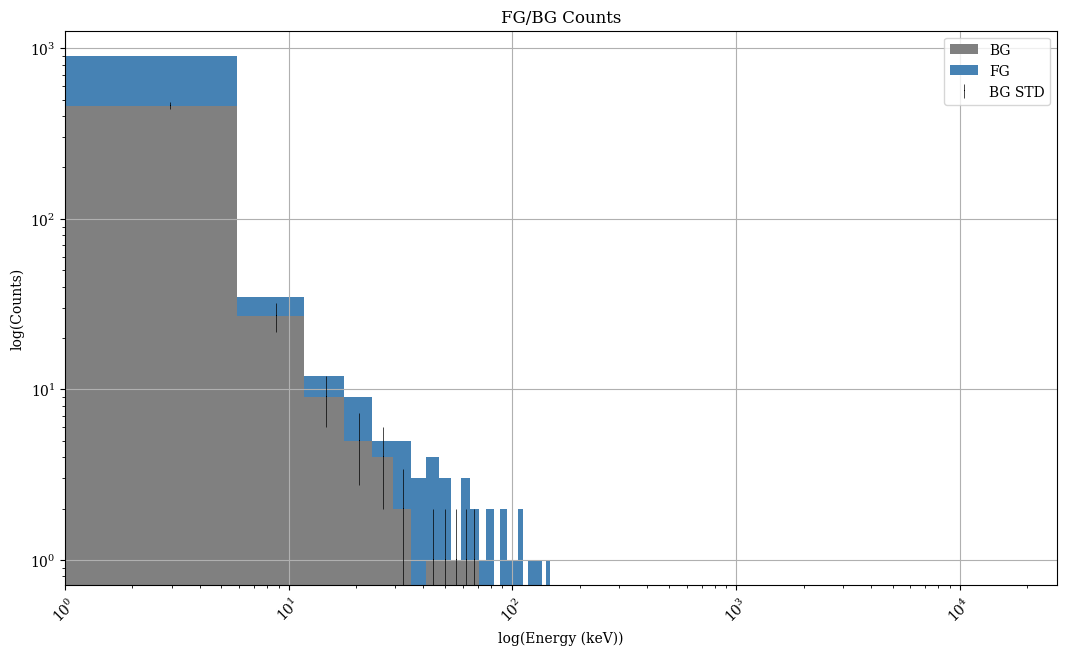

In [10]:
def plot_fg_and_bg_spectra(fg_ss, bg_ss, index=0,
                           figsize: tuple = (12.8, 7.2),
                           xscale: str = "linear", yscale: str = "log",
                           xlim: tuple = (None, None), ylim: tuple = (None, None),
                           ylabel: str = None, title: str = None, legend_loc: str = None):
    """Plots the first foreground spectrum alongside the first background spectrum and shows the
       error bars per channel for the background spectrum.
    """

    labels = []
    colors = ['grey', 'steelblue']
    bg = bg_ss.spectra.iloc[index]
    labels.append("BG")
    fg = fg_ss.spectra.iloc[index]
    labels.append("FG")

    bins = fg_ss.get_channel_energies(index)

    fig, ax = plt.subplots(figsize=figsize)
    ax.grid()
    y, bin_edges, _ = ax.hist([bg, fg], bins, label=labels, color=colors,
                              stacked=True, density=False)

    y_bg = y[0]
    bin_centers = .5 * (bin_edges[1:] + bin_edges[:-1])
    ax.errorbar(bin_centers, y_bg, yerr=np.sqrt(y_bg), ecolor='black',
                elinewidth=.5, fmt="k,", label="BG STD")

    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if xscale == "log":
        ax.set_xlabel("log(Energy (keV))")
    else:
        ax.set_xlabel("Energy (keV)")
    ax.tick_params(axis="x", rotation=45)

    if ylabel:
        ax.set_ylabel(ylabel)
    elif yscale == "log":
        ax.set_ylabel("log(Counts)")
    else:
        ax.set_ylabel("Counts")

    if title:
        ax.set_title(title)
    else:
        ax.set_title("FG/BG Counts")

    if legend_loc:
        ax.legend(loc=legend_loc)
    else:
        ax.legend()

    return fig, ax

plot_fg_and_bg_spectra(fg_ss, bg_ss, index=3000, yscale='log', xscale='log', xlim=(1,None))

8 294


/ascldap/users/lcross/anaconda3/envs/pyriid/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<Figure size 1280x720 with 1 Axes>,
 <Axes: title={'center': 'FG/BG Counts'}, xlabel='Energy (keV)', ylabel='Counts'>)

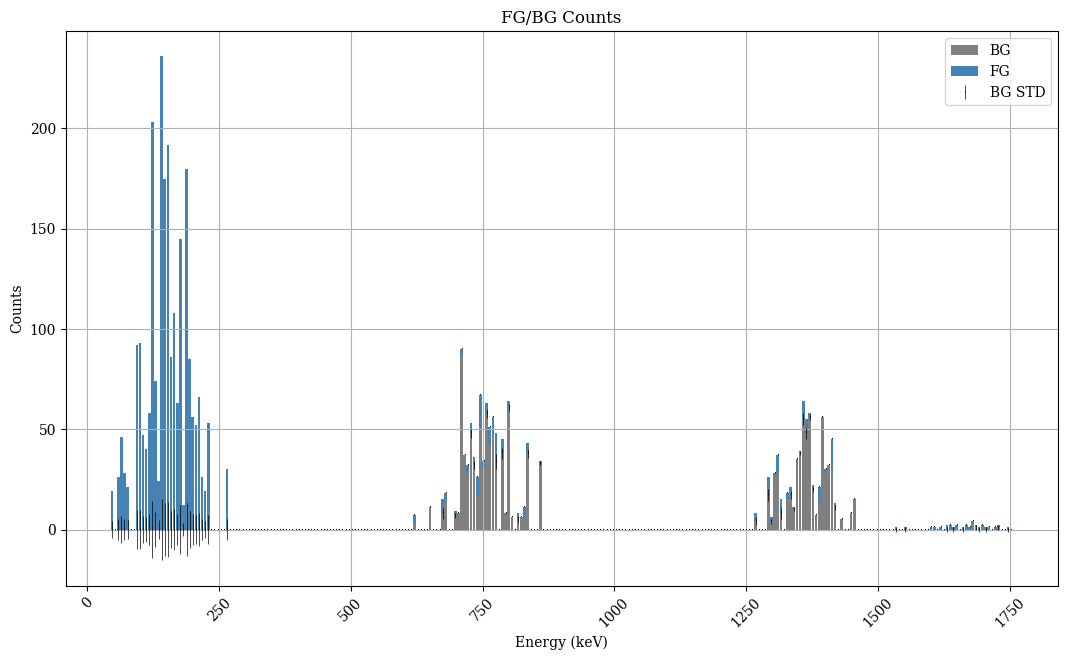

In [60]:
def plot_fg_and_bg_spectra(fg_ss, bg_ss, index=0,
                           figsize: tuple = (12.8, 7.2),
                           xscale: str = "linear", yscale: str = "linear",
                           xlim: tuple = (None, None), ylim: tuple = (None, None),
                           ylabel: str = None, title: str = None, legend_loc: str = None):
    """Plots the first foreground spectrum alongside the first background spectrum and shows the
       error bars per channel for the background spectrum.
    """
    colors = ['grey', 'steelblue', 'black']
    labels = ['BG', 'FG', "BG STD"]
    fig, ax = plt.subplots(figsize=figsize)

    bins = fg_ss.get_channel_energies(index)
    bars1 = bg_ss.spectra.iloc[index]
    bars2 = fg_ss.spectra.iloc[index]

    nonzeroind = np.nonzero(bars2)[0]
    min_bin = min(nonzeroind)
    max_bin = max(nonzeroind)

    bars1 = bars1[min_bin:max_bin]
    bars2 = bars2[min_bin:max_bin]

    print(min_bin, max_bin)
    bins = fg_ss.get_channel_energies(index)[min_bin:max_bin]

    barwidth = 5

    ax.bar(bins, bars1, width=barwidth, label=labels[0], color=colors[0])
    ax.bar(bins, bars2, bottom=bars1, width=barwidth, label=labels[1], color=colors[1])
    ax.grid()
    ax.errorbar(bins, bars1, yerr=np.sqrt(bars2), ecolor=colors[2],
          elinewidth=.5, fmt="k,", label=labels[2])


    

    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)

    if xscale == "log":
        ax.set_xlabel("log(Energy (keV))")
    else:
        ax.set_xlabel("Energy (keV)")
    ax.tick_params(axis="x", rotation=45)

    if ylabel:
        ax.set_ylabel(ylabel)
    elif yscale == "log":
        ax.set_ylabel("log(Counts)")
    else:
        ax.set_ylabel("Counts")

    if title:
        ax.set_title(title)
    else:
        ax.set_title("FG/BG Counts")

    if legend_loc:
        ax.legend(loc=legend_loc)
    else:
        ax.legend()

    return fig, ax

plot_fg_and_bg_spectra(fg_ss, bg_ss, index=0, yscale='linear', xscale='linear', xlim=(1,None))




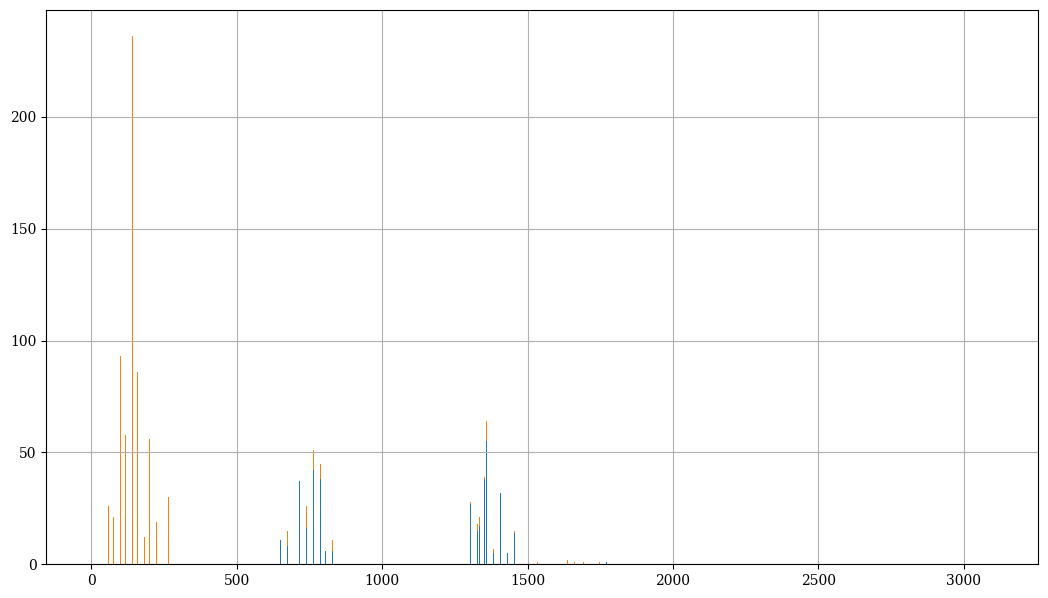

In [55]:
fig, ax = plt.subplots(figsize=(12.8, 7.2))

index = 0
bins = fg_ss.get_channel_energies(index)
bars1 = bg_ss.spectra.iloc[index]
bars2 = fg_ss.spectra.iloc[index]

barwidth = 1

ax.bar(bins, bars1, width=barwidth)
ax.bar(bins, bars2, bottom=bars1, width=barwidth)
ax.grid()

plt.show()

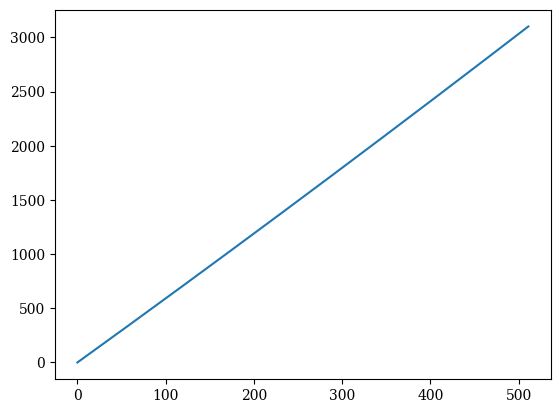

In [ ]:
plt.plot(fg_ss.get_channel_energies(index))